# 1

In [313]:
import json
from pprint import pprint

data = json.load(open('reduced_dblp.json'))

#pprint(data)

In [45]:
'''for i in data[0]:
    print(i)'''
for i in data[0]['authors']:
    print(i['author'])
    print(i['author_id'])

h&eacute;lio marcos paz de almeida
255206
dorgival olavo guedes neto
255207
wagner meira jr.
16585
mohammed j. zaki
255208


In [61]:
#search for all authors with conference ID
def searchConfId(confId):
    author_list = []
    for item in data:
        conferenceId = item["id_conference_int"]
        if(confId == conferenceId):
            authors = item["authors"]
            for author in authors:
                authorId = author["author_id"]
                author_list.append(authorId)
    return author_list
            

In [62]:
len(searchConfId(3345))

731

In [14]:
data[0]["authors"][0]["author_id"]

255206

In [48]:
## Convert dictionary to author:{list of publication}

#author:{list of publication}

dict_author_pub = {}
dict_author_conf = {}
dict_publication = {}
author_publication_list = []


for item in data:
    publicationId = item["id_publication_int"]
    publicationTitle = item["title"]
    dict_publication = {}
    dict_publication[publicationId] = publicationTitle

    authors = item["authors"]  
    for author in authors:
        author_publication_list = []
        
        authorId= author["author_id"]
        authorName = author["author"]
        
        if authorId in dict_author_pub.keys():
            author_publication_list = dict_author_pub[authorId]
            author_publication_list.append(dict_publication)
            dict_author_pub[authorId] = author_publication_list
            
        else:
            author_publication_list.append(dict_publication)
            dict_author_pub[authorId] = author_publication_list

        
    

In [49]:
len(dict_author_pub)

7771

In [314]:
#dict_author_pub

In [122]:
'''
dictt={}
test = dict_author[93126]
for item in test:
    key = list(item.keys())[0]
    value = list(item.values())[0]
    dictt[key] =value
'''    
def listToDict(pubList):
    dictt={}
    for item in pubList:
        key = list(item.keys())[0]
        value = list(item.values())[0]
        dictt[key] =value
    return dictt

def jaccard(p1,p2):
    p1= listToDict(p1)
    p2= listToDict(p2)
    p1_int_p2=len(set(p1).intersection(p2))
    result = 1 - (p1_int_p2 / (len(p1) + len(p2)- p1_int_p2))
    
    return result
    

In [341]:
# create graph
import networkx as nx
G=nx.Graph()
for item in data:
    authors = item["authors"]  
    for author in authors:
        for author2 in authors:
            aId= author["author_id"]
            a2Id= author2["author_id"]
            if( (aId != a2Id) and not(G.has_edge(aId,a2Id))  ):
                r_weight= jaccard(dict_author_pub[aId],dict_author_pub[a2Id])
                #print(r_weight)
                G.add_edge(aId,a2Id, weight=r_weight)

In [342]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 7653
Number of edges: 16488
Average degree:   4.3089


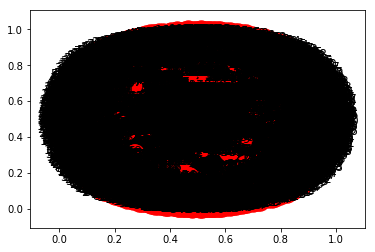

In [316]:
import matplotlib.pyplot as plt
nx.draw_networkx(G,label=False)
plt.show()

# 2a (degree, between, closeness)

In [317]:
#givena conference ID return the subgraph induced by the set of authors who published at the input conference at least once
conf=int(input())
H = G.subgraph(searchConfId(conf))

3052


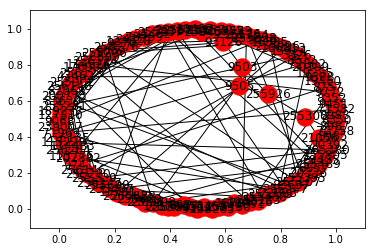

In [318]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
#g1 = nx.petersen_graph()
nx.draw_networkx(H, with_labels= True)
plt.show()

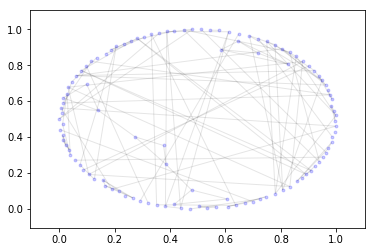

In [319]:
from pylab import show
# create the layout
pos = nx.spring_layout(H)
# draw the nodes and the edges (all)
nx.draw_networkx_nodes(H,pos,node_color='b',alpha=0.2,node_size=8)
nx.draw_networkx_edges(H,pos,alpha=0.1)
plt.show()

**Degree**:

which is defined as the number of links incident upon a node 

In [320]:
degree=sorted(nx.degree(H).values(),reverse=True) #value

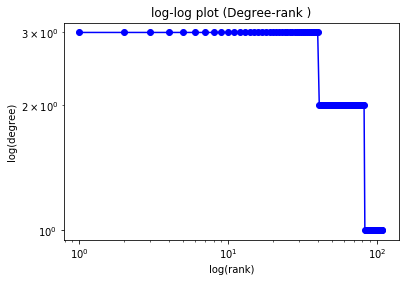

In [321]:
#plot degree in a loglog plot
import matplotlib.pyplot as plt
degree_sequence=sorted(nx.degree(H).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("log-log plot (Degree-rank )")
plt.ylabel("log(degree)")
plt.xlabel("log(rank)")
plt.show()

**Betweenness**:

Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes.

In [323]:
betw=nx.betweenness_centrality(H, k=100, normalized=True, weight="weight", endpoints=False, seed=None)

In [324]:
import operator
print(sorted(betw.items(),
            key=operator.itemgetter(1),reverse=True))

[(255926, 0.002262626262626263), (9503, 0.002262626262626263), (93126, 0.0017122577122577127), (255300, 0.0017122577122577127), (23845, 0.001156793156793157), (21056, 0.001156793156793157), (255206, 0.0010930930930930934), (255487, 0.0010930930930930934), (113776, 0.0010930930930930934), (9068, 0.0010930930930930934), (256146, 0.0010930930930930934), (72882, 0.0007287287287287288), (255689, 0.000631904631904632), (255759, 0.000631904631904632), (255488, 0.000608972608972609), (255247, 0.000608972608972609), (9046, 0.000608972608972609), (256147, 0.000608972608972609), (72883, 0.000608972608972609), (255690, 0.00037200837200837203), (255328, 0.00036691236691236697), (255760, 0.0003414323414323415), (255207, 0.00024460824460824463), (255280, 0.00024460824460824463), (255339, 0.00024460824460824463), (210891, 0.00024460824460824463), (3476, 0.00024460824460824463), (82068, 0.00024460824460824463), (9069, 0.00024460824460824463), (124828, 0.00024460824460824463), (9771, 0.00024460824460824

**Most important** nodes in the *subgraph*

In [325]:
#most important node 
def most_important(G):
        ranking = nx.betweenness_centrality(G).items()
        r = [x[1] for x in ranking]
        m = sum(r)/len(r) # mean centrality
        t = m*3 # threshold, we keep only the nodes with 3 times the mean
        Gt = G.copy()
        for k, v in ranking:
            if v < t:
                Gt.remove_node(k)
        return Gt

In [326]:
Gt=most_important(H)

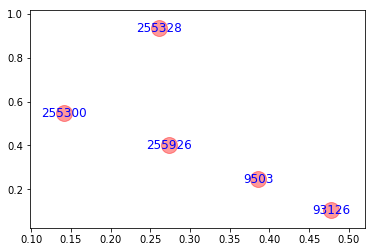

In [327]:
# draw the most important nodes with a different style
nx.draw_networkx_nodes(Gt,pos,node_color='r',alpha=0.4,node_size=254)
# also the labels this time
nx.draw_networkx_labels(Gt,pos,font_size=12,font_color='b')
show()

**Closeness**:

In a connected graph, the normalized closeness centrality (or closeness) of a node is the average length of the shortest path between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes.

In [328]:
clos=nx.closeness_centrality(H)

In [329]:
#top ten nodes!
def get_top_keys(dictionary, top):
    items = sorted(dictionary.items(),reverse=True, key=lambda x: x[1])
    return list(map(lambda x: x[0], items[:top]))

In [330]:
top_clo_cen = get_top_keys(clos,10)

In [331]:
top_clo_cen

[255926, 9503, 93126, 9505, 255300, 255206, 255207, 16585, 255208, 255405]

In [332]:
clos_graph=H.subgraph(top_clo_cen)

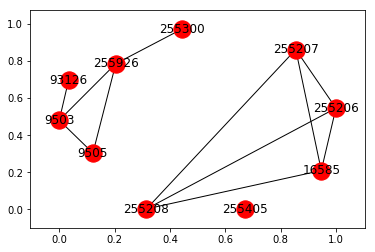

In [334]:
nx.draw_networkx(clos_graph, with_labels= True)
plt.show()

# 2b (hop-distance)

In [15]:
#len(G.nodes())
import matplotlib.pyplot as plt
def hopDistance(author,d):
    degreeList =[]
    for node in G.nodes():
        if nx.has_path(G,author,node):
            edges = len(nx.shortest_path(G, source=author, target=node, weight=None)) - 1
            if(edges <= d):
                degreeList.append(node)
    

    H = G.subgraph(degreeList)
    nx.draw_networkx(H, with_labels= True)
    plt.show()

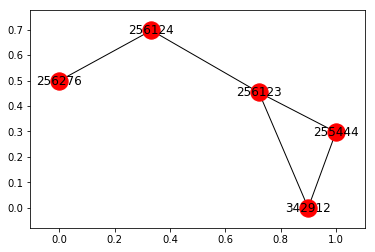

In [16]:
hopDistance(256123,3)

# 3 (erdos)

In [57]:
#len(G.nodes())
import matplotlib.pyplot as plt
def erdosNumber(target_node):
    author = 256123
    degreeList =[]
    if nx.has_path(G,author,target_node):
        length_weight  = nx.shortest_path_length(G, source=author, target=target_node, weight="weight")
    return length_weight

In [58]:
erdosNumber(255444)

1.6666666666666667

In [59]:
nx.shortest_path(G, source=256123, target=255444, weight=None)

[256123, 255444]

In [64]:
G.neighbors(255444)

[256123, 342912]

In [61]:
dict_author_pub[70758]

[{162632: 'clustering rankings in the fourier domain.'}]

In [38]:
dict_author_pub[256124]

[{162307: 'constraint selection for semi-supervised topological clustering.'},
 {162460: 'constrained laplacian score for semi-supervised feature selection.'}]

### Shortest Path function

In [279]:
graph = {'A': ['B', 'C'],
             'B': ['C', 'D'],
             'C': ['D'],
             'D': ['C'],
             'E': ['F'],
             'F': ['C']}

In [280]:
import networkx as nx

In [281]:
def find_all_paths(graph, start, end, path=[]):
        path = path + [start]
        if start == end:
            return [path]
        if start not in graph:
            return []
        paths = []
        for node in graph[start]:
            if node not in path:
                newpaths = find_all_paths(graph, node, end, path)
                for newpath in newpaths:
                    paths.append(newpath)
        return paths

In [282]:
find_all_paths(graph, 'A', 'D')

[['A', 'B', 'C', 'D'], ['A', 'B', 'D'], ['A', 'C', 'D']]

In [283]:
def find_shortest_path(graph, start, end, path=[]):
        path = path + [start]
        if start == end:
            return path
        if start not in graph:
            return None
        shortest = None
        for node in graph[start]:
            if node not in path:
                newpath = find_shortest_path(graph, node, end, path)
                if newpath:
                    if not shortest or len(newpath) < len(shortest):
                        shortest = newpath
        return shortest

In [284]:
find_shortest_path(graph,'A','D')

['A', 'B', 'D']

In [180]:
graph={'a': {'b': {'w':4}, 'c':{'w':8}, 's':{ 'w':3}},
 'b': {'a':{'w':2}, 'd': {'w':2}, 's': {'w':4}},
 'c': {'a': {'w':2}, 'd': {'w':7}, 't': {'w':4}},
 'd': {'b': {'w':1}, 'c': {'w':11}, 't': {'w':5}},
 's': {'a': {'w':2}, 'b': {'w':1}},
 't': {'c': {'w':3}, 'd': {'w':5}}}

In [157]:
g={'s': {'a': 2, 'b': 1},
'a': {'s': 3, 'b': 4, 'c':8},
'b': {'s': 4, 'a': 2, 'd': 2},
'c': {'a': 2, 'd': 7, 't': 4},
'd': {'b': 1, 'c': 11, 't': 5},
't': {'c': 3, 'd': 5}}

In [158]:
def dijkstra(graph,src,dest,visited=[],distances={},predecessors={}):
    """ calculates a shortest path tree routed in src
    """    
    # a few sanity checks
    if src not in graph:
        raise TypeError('The root of the shortest path tree cannot be found')
    if dest not in graph:
        raise TypeError('The target of the shortest path cannot be found')    
    # ending condition
    if src == dest:
        # We build the shortest path and display it
        path=[]
        pred=dest
        while pred != None:
            path.append(pred)
            pred=predecessors.get(pred,None)
        print('shortest path: '+str(path)+" cost="+str(distances[dest])) 
    else :     
        # if it is the initial  run, initializes the cost
        if not visited: 
            distances[src]=0
        # visit the neighbors
        for neighbor in graph[src] :
            if neighbor not in visited:
                new_distance = distances[src] + graph[src][neighbor]
                if new_distance < distances.get(neighbor,float('inf')):
                    distances[neighbor] = new_distance
                    predecessors[neighbor] = src
        # mark as visited
        visited.append(src)
        # now that all neighbors have been visited: recurse                         
        # select the non visited node with lowest distance 'x'
        # run Dijskstra with src='x'
        unvisited={}
        for k in graph:
            if k not in visited:
                unvisited[k] = distances.get(k,float('inf'))        
        x=min(unvisited, key=unvisited.get)
        dijkstra(graph,x,dest,visited,distances,predecessors)
        


In [159]:
dijkstra(g,'s','t')

shortest path: ['t', 'd', 'b', 's'] cost=8


In [200]:
print(nx.dijkstra_path(G,255444,342912,weight='weight'))

[255444, 342912]


In [336]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 7653
Number of edges: 16488
Average degree:   4.3089


In [338]:
len(dict_author_pub)

7771

In [207]:
from heapq import heappush, heappop
from itertools import count

import networkx as nx

def k_shortest_paths(G, source, target, k=1, weight='weight'):
    """Returns the k-shortest paths from source to target in a weighted graph G.
    Parameters
    ----------
    G : NetworkX graph
    source : node
       Starting node
    target : node
       Ending node
       
    k : integer, optional (default=1)
        The number of shortest paths to find
    weight: string, optional (default='weight')
       Edge data key corresponding to the edge weight
    Returns
    -------
    lengths, paths : lists
       Returns a tuple with two lists.
       The first list stores the length of each k-shortest path.
       The second list stores each k-shortest path.  
    Raises
    ------
    NetworkXNoPath
       If no path exists between source and target.
    Examples
    --------
    >>> G=nx.complete_graph(5)    
    >>> print(k_shortest_paths(G, 0, 4, 4))
    ([1, 2, 2, 2], [[0, 4], [0, 1, 4], [0, 2, 4], [0, 3, 4]])
    Notes
    ------
    Edge weight attributes must be numerical and non-negative.
    Distances are calculated as sums of weighted edges traversed.
    """
    if source == target:
        return ([0], [[source]]) 
       
    length, path = nx.single_source_dijkstra(G, source, target, weight=weight)
    if target not in length:
        raise nx.NetworkXNoPath("node %s not reachable from %s" % (source, target))
        
    lengths = [length[target]]
    paths = [path[target]]
    c = count()        
    B = []                        
    G_original = G.copy()    
    
    for i in range(1, k):
        for j in range(len(paths[-1]) - 1):            
            spur_node = paths[-1][j]
            root_path = paths[-1][:j + 1]
            
            edges_removed = []
            for c_path in paths:
                if len(c_path) > j and root_path == c_path[:j + 1]:
                    u = c_path[j]
                    v = c_path[j + 1]
                    if G.has_edge(u, v):
                        edge_attr = G.edge[u][v]
                        G.remove_edge(u, v)
                        edges_removed.append((u, v, edge_attr))
            
            for n in range(len(root_path) - 1):
                node = root_path[n]
                # out-edges
                for u, v, edge_attr in G.edges_iter(node, data=True):
                    G.remove_edge(u, v)
                    edges_removed.append((u, v, edge_attr))
                
                if G.is_directed():
                    # in-edges
                    for u, v, edge_attr in G.in_edges_iter(node, data=True):
                        G.remove_edge(u, v)
                        edges_removed.append((u, v, edge_attr))
            
            spur_path_length, spur_path = nx.single_source_dijkstra(G, spur_node, target, weight=weight)            
            if target in spur_path and spur_path[target]:
                total_path = root_path[:-1] + spur_path[target]
                total_path_length = get_path_length(G_original, root_path, weight) + spur_path_length[target]                
                heappush(B, (total_path_length, next(c), total_path))
                
            for e in edges_removed:
                u, v, edge_attr = e
                G.add_edge(u, v, edge_attr)
                       
        if B:
            (l, _, p) = heappop(B)        
            lengths.append(l)
            paths.append(p)
        else:
            break
    
    return (lengths, paths)

def get_path_length(G, path, weight='weight'):
    length = 0
    if len(path) > 1:
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            
            length += G.edge[u][v].get(weight, 1)
    
    return length    
    

In [211]:
k_shortest_paths(G,255444, 342912,weight='weight')

([0.0], [[255444, 342912]])

In [260]:
def _single_source_dijkstra_path_basic(G, s, weight):
    # modified from Eppstein
    S = []
    P = {}
    for v in G:
        P[v] = []
    sigma = dict.fromkeys(G, 0.0)    # sigma[v]=0 for v in G
    D = {}
    sigma[s] = 1.0
    push = heappush
    pop = heappop
    seen = {s: 0}
    c = count()
    Q = []   # use Q as heap with (distance,node id) tuples
    push(Q, (0, next(c), s, s))
    while Q:
        (dist, _, pred, v) = pop(Q)
        if v in D:
            continue  # already searched this node.
        sigma[v] += sigma[pred]  # count paths
        S.append(v)
        D[v] = dist
        for w, edgedata in G[v].items():
            vw_dist = dist + edgedata.get(weight, 1)
            if w not in D and (w not in seen or vw_dist < seen[w]):
                seen[w] = vw_dist
                push(Q, (vw_dist, next(c), v, w))
                sigma[w] = 0.0
                P[w] = [v]
            elif vw_dist == seen[w]:  # handle equal paths
                sigma[w] += sigma[v]
                P[w].append(v)
    return S, P, sigma

In [261]:
_single_source_dijkstra_path_basic(G,342912)

NameError: name 'single_source_dijkstra_path_basic' is not defined

In [263]:
_single_source_dijkstra_path_basic(G,342912,weight='weight')

([342912, 255444, 256123, 256124, 256276],
 {255206: [],
  255207: [],
  16585: [],
  255208: [],
  255280: [],
  255281: [],
  3326: [],
  20405: [],
  20407: [],
  255339: [],
  205380: [],
  115228: [],
  210891: [],
  255394: [],
  255395: [],
  255405: [],
  9308: [],
  175195: [],
  17178: [],
  176994: [],
  73799: [],
  24151: [],
  255487: [],
  255488: [],
  3476: [],
  255489: [],
  166813: [],
  13781: [],
  9741: [],
  8757: [],
  255537: [],
  21462: [],
  113776: [],
  255247: [],
  82068: [],
  255673: [],
  255688: [],
  255689: [],
  255690: [],
  255691: [],
  255814: [],
  200773: [],
  93126: [],
  23845: [],
  208589: [],
  127810: [],
  255902: [],
  255926: [],
  9503: [],
  9505: [],
  9068: [],
  9046: [],
  9069: [],
  9070: [],
  255996: [],
  20199: [],
  124828: [],
  239007: [],
  189237: [],
  256123: [342912, 255444],
  256124: [256123],
  8985: [],
  8987: [],
  8988: [],
  19285: [],
  19460: [],
  8612: [],
  256146: [],
  256147: [],
  9771: [],
  2